In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import spikefinder_eval as se

import scipy.stats as stats

sns.set_style('whitegrid')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [11]:
data = pd.read_csv('data/results_30_06_17.csv', 
                   usecols=['algo', 'dset', 'measure', 'split', 'value', 
                           'rel value','cell'])


subs = pd.read_csv('data/submissions_22_06_17.csv')


In [12]:
subs['days'] = np.float64(subs['days']) - 24



In [13]:
data.loc[data['dset']==1,'indicator'] = 'ogb'
data.loc[data['dset']==2,'indicator'] = 'ogb'
data.loc[data['dset']==4,'indicator'] = 'ogb'
data.loc[data['dset']==3,'indicator'] = 'gcamp'
data.loc[data['dset']==5,'indicator'] = 'gcamp'

In [14]:
data.head(10)

,algo,cell,dset,measure,rel value,split,value,indicator
0,stm,0,1,corr,NaN,test,0.524731,ogb
1,stm,1,1,corr,NaN,test,0.486117,ogb
2,stm,2,1,corr,NaN,test,0.454547,ogb
3,stm,3,1,corr,NaN,test,0.512064,ogb
4,stm,4,1,corr,NaN,test,0.560148,ogb
5,stm,0,1,corr_bits,NaN,test,0.464629,ogb
6,stm,1,1,corr_bits,NaN,test,0.388941,ogb
7,stm,2,1,corr_bits,NaN,test,0.333904,ogb
8,stm,3,1,corr_bits,NaN,test,0.438718,ogb
9,stm,4,1,corr_bits,NaN,test,0.543227,ogb


In [15]:
subs.head()

,Unnamed: 0,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
0,0,stm,2016-11-25 02:33:35.196,0.0,test submission,0.387497,0.388992,0.413346,0.420325,0.000000
1,1,oopsi,2016-11-25 02:36:37.119,0.0,test submission,0.258987,0.249635,0.318677,0.326346,-0.128510
2,2,derivative,2016-11-27 09:04:02.070,2.0,test submission,0.103576,0.115694,0.120749,0.123729,-0.283921
3,3,Suite2p,2016-12-04 19:15:26.173,9.0,marius10p,0.423142,0.428679,0.467852,0.471965,0.035645
4,4,Vanilla_0.0a,2017-01-31 04:10:09.410,67.0,Dario Ringach,0.422702,0.428309,0.462818,0.454570,0.035205


## Figure 1

* Submission times
* Example predictions
* Violinplots of performance / relative to stm?
* For different datasets
* Analysis of overfitting?



### Panel a

Number of submissions:  39


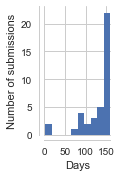

In [16]:
f = plt.figure(figsize=(3/2.54,6/2.54))

subs2 = subs.loc[~(subs['algo'] == 'stm') & ~(subs['algo'] == 'oopsi'),:]

plt.hist(subs2['days'])

plt.xlabel('Days')
plt.ylabel('Number of submissions')

plt.xticks([0, 50, 100, 150])

plt.xlim((0,160))

sns.despine(offset=5)

f.savefig('figures/fig1a_date.pdf',bbox_inches='tight')

print('Number of submissions: ', subs2.shape[0])

In [17]:
# determine order of algorithms   
gdata = data[data['measure']=='corr'].groupby(['algo', 'split'])['value','rel value'].mean().reset_index()
gdata = gdata[gdata['split']=='test'].sort_values(by='value', ascending=0)

order = gdata['algo'].as_matrix()

### Panel 1b: Mean correlation coefficients

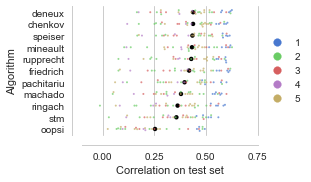

In [18]:


f = plt.figure(figsize=(8/2.54,6/2.54))

idx = (data['split']=='test') & (data['measure']=='corr')

ax = sns.swarmplot(data=data[idx], 
                   x='value', y='algo',hue='dset',
                   order=order,palette="muted", alpha=.7, size=2 , orient='h')

sns.pointplot(data=data[idx], 
                   x='value', y='algo', estimator = np.mean, ci=False,
                   order=order,color='k', join=False, markers='.',
                legend_out=False, orient='h', scale=.7)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Correlation on test set')
plt.ylabel('Algorithm')
plt.xlim((-.1, .7))
plt.xticks([0, 0.25, 0.5, .75])

sns.despine(offset=10)

f.savefig('figures/fig1_correlation.pdf',bbox_inches='tight')


 For the relative correlation improvement, I compute
 
 $$ v_i^{algo} = c_i^{algo}-c_i^{stm}$$

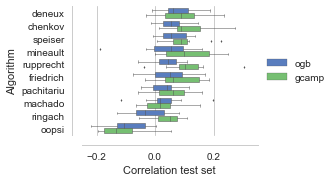

In [22]:
order2 = gdata['algo'].as_matrix()
order2 = order2[order2!='stm'] 

f = plt.figure(figsize=(8/2.54,6/2.54))

idx = (data['split']=='test') & (data['measure']=='corr') & (data['algo']!='stm')

ax = sns.boxplot(data=data[idx], 
                   y='algo', x='rel value', hue='indicator',
                    order=order2,palette="muted", orient='h', linewidth=.5, fliersize=2)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Correlation test set')
plt.ylabel('Algorithm')

plt.xlim((-.25,.35))

sns.despine(offset=10)

f.savefig('figures/fig1_correlation_imp.pdf',bbox_inches='tight')


In [14]:
hdata = data[data['measure']=='corr'].groupby(['algo', 'split'])['value','rel value'].mean().reset_index()
hdata = hdata[hdata['split']=='test'].sort_values(by='value', ascending=0)
hdata['in bits'] = -np.log2(1-hdata['value']**2)

stm = hdata.loc[hdata['algo']=='stm','in bits'].as_matrix()
hdata['rel in bits'] = np.round(100*(hdata['in bits'] - stm)/stm,1)

hdata




,algo,split,value,rel value,in bits,rel in bits
2,deneux,test,0.438228,0.081036,0.307652,56.2
0,chenkov,test,0.437815,0.080623,0.307006,55.9
18,speiser,test,0.434734,0.077541,0.302214,53.5
8,mineault,test,0.432472,0.075280,0.298730,51.7
16,rupprecht,test,0.429115,0.071922,0.293605,49.1
4,friedrich,test,0.418848,0.061656,0.278293,41.3
12,pachitariu,test,0.396692,0.039499,0.247020,25.4
6,machado,test,0.379407,0.022214,0.224232,13.9
14,ringach,test,0.362944,0.005751,0.203781,3.5
20,stm,test,0.357193,NaN,0.196916,0.0


### Panel 1c: Repeated measure ANOVA

In [11]:
adata = data[(data['split']=='test')& (data['measure']=='corr')].copy()
adata = adata[['algo', 'cell', 'dset', 'value']]

In [12]:
adata['ucell'] = adata['cell'] + adata['dset'] * 10

In [15]:
%load_ext rpy2.ipython

In [40]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()

In [41]:
r_data = pandas2ri.py2ri(adata)

In [44]:
afex = importr('afex') 
model = afex.aov_ez('ucell', 'value', r_data, within='algo')
print(model)

Anova Table (Type 3 tests)



Response: value

  Effect           df  MSE         F ges p.value

1   algo 5.12, 148.50 0.00 42.09 *** .14  <.0001



Sphericity correction method: GG 



In [45]:
lsm  = importr('lsmeans')
pairwise = lsm.lsmeans(model, "algo", contr="pairwise", adjust="holm")
# print(pairwise)

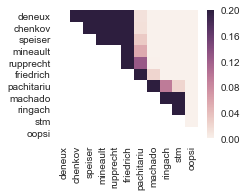

In [28]:
pvalues = pd.read_excel('figures/pairwise_comp.xls')


f = plt.figure(figsize=(8/2.54,6/2.54))

sns.heatmap(pvalues, vmin=0, vmax=.2)

#sns.despine(offset=10)

f.savefig('figures/pairwise.pdf',bbox_inches='tight')


## Figure 2: Example responses


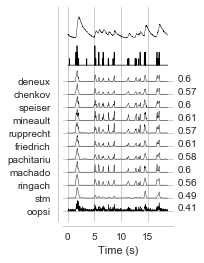

In [9]:
# here will be some spike trains

algos =  ['stm','chenkov', 'deneux', 'friedrich', 'machado', 'mineault', 
               'pachitariu', 'ringach', 'rupprecht', 'speiser', 'oopsi']

f = plt.figure(figsize=(5/2.54,10/2.54))

# for paper 2 examples
dset = '3.test'
neuron = '2'
tw = np.arange(2000,5000)

#dset = '1.test'
#neuron = '3'
#tw = np.arange(14000,17000)

t = np.round((tw[-1]-tw[0])/4)
t =np.arange(0,t*25,25)/1000

file = 'T:/data/spikefinder/truth/{}.spikes.csv'.format(dset)
spikes = se._downsample(se.load(file).loc[tw,neuron].as_matrix(),4)

file = 'T:/data/spikefinder/truth/{}.calcium.csv'.format(dset)
calcium = se._downsample(se.load(file).loc[tw,neuron].as_matrix(),4)

calcium = (calcium-np.min(calcium,axis=0))/(np.max(calcium,axis=0)-np.min(calcium,axis=0))

sp = sns.color_palette()

ax = plt.plot(t,.6*spikes-2.5,color='k', linewidth=.7)  
plt.plot(t,2*calcium,color='k', linewidth=.4) 

ticks = np.zeros_like(order)
lab = []

for a, algo in enumerate(order): 
    file = 'T:/data/spikefinder/{}/{}.spikes.csv'.format(algo, dset)
    pred = se.load(file)
            
    pred = se._downsample(pred.loc[tw,neuron].as_matrix(),4)
    
    id = (data['measure']==
      'corr') & (data['dset']==
                 np.int32(dset[0])) & (data['cell']==
                                       np.int32(neuron)) & (data['split']==
                                       'test') & (data['algo']==
                                       algo) 
    
    c = np.round(data.loc[id,'value'].as_matrix(),2)
    
    pred = (pred-np.min(pred,axis=0))/(np.max(pred,axis=0)-np.min(pred,axis=0))
    
    plt.plot(t,pred-1.2*a-4,color='k', linewidth=.4)
    
    ticks[a] = -1.2*a-4
    
    plt.text(1.05*plt.xlim()[1],-1.2*a-4, '{}'.format(c[0]))
    
    
plt.yticks(ticks,order)
plt.xticks([0, 5, 10, 15])
plt.xlabel('Time (s)')

sns.despine(offset=5)

f.savefig('figures/fig1_gcamp_example.pdf',bbox_inches='tight', dpi=300)



## Other Info

### How many cells per dataset

In [53]:
data[(data['split']=='train') & (data['algo']=='chenkov')].groupby(['dset','algo','measure']).count()

cell  rel value  split  value
dset algo    measure                                 
1    chenkov corr         11         11     11     11
             corr_bits    11         11     11     11
             rank         11         11     11     11
2    chenkov corr         21         21     21     21
             corr_bits    21         21     21     21
             rank         21         21     21     21
3    chenkov corr         13         13     13     13
             corr_bits    13         13     13     13
             rank         13         13     13     13
4    chenkov corr          6          6      6      6
             corr_bits     6          6      6      6
             rank          6          6      6      6
5    chenkov corr          9          9      9      9
             corr_bits     9          9      9      9
             rank          9          9      9      9